In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("Sales_Data/Sales_April_2019.csv")

In [3]:
import os
import glob

csv_files = glob.glob(os.path.join("Sales_Data", "*.csv"))

df_list = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

merged_df.to_csv("Sales_Data/merged_sales_data.csv", index=False)

In [4]:
all_data = pd.read_csv("Sales_Data/merged_sales_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


###  Add month column


In [5]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",07
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",07


# Clean up the data

## drop rows of nan

In [6]:
all_data.isna().sum()

Order ID            4905
Product             4905
Quantity Ordered    4905
Price Each          4905
Order Date          4905
Purchase Address    4905
Month               4905
dtype: int64

In [7]:
all_data = all_data.dropna(how='all')
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [8]:
all_data['Month'].unique()

array(['07', 'Or', '08', '04', '05', '02', '03', '11', '12', '10', '01',
       '06', '09'], dtype=object)

### Find 'Or' and delete it

In [9]:
all_data = all_data[~(all_data['Month'] == "Or")]

## Convert columns to the correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [11]:
all_data['Month'] = all_data['Month'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


# Add Sales column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [13]:
cols = list(all_data.columns)
cols.insert(cols.index('Price Each') + 1, cols.pop(cols.index('Sales')))
all_data = all_data[cols]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150.00,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300.00,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,14.95,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


## What is the best month for for sales? How much is earned that much?

In [14]:
results = all_data.groupby('Month').sum(numeric_only=True)

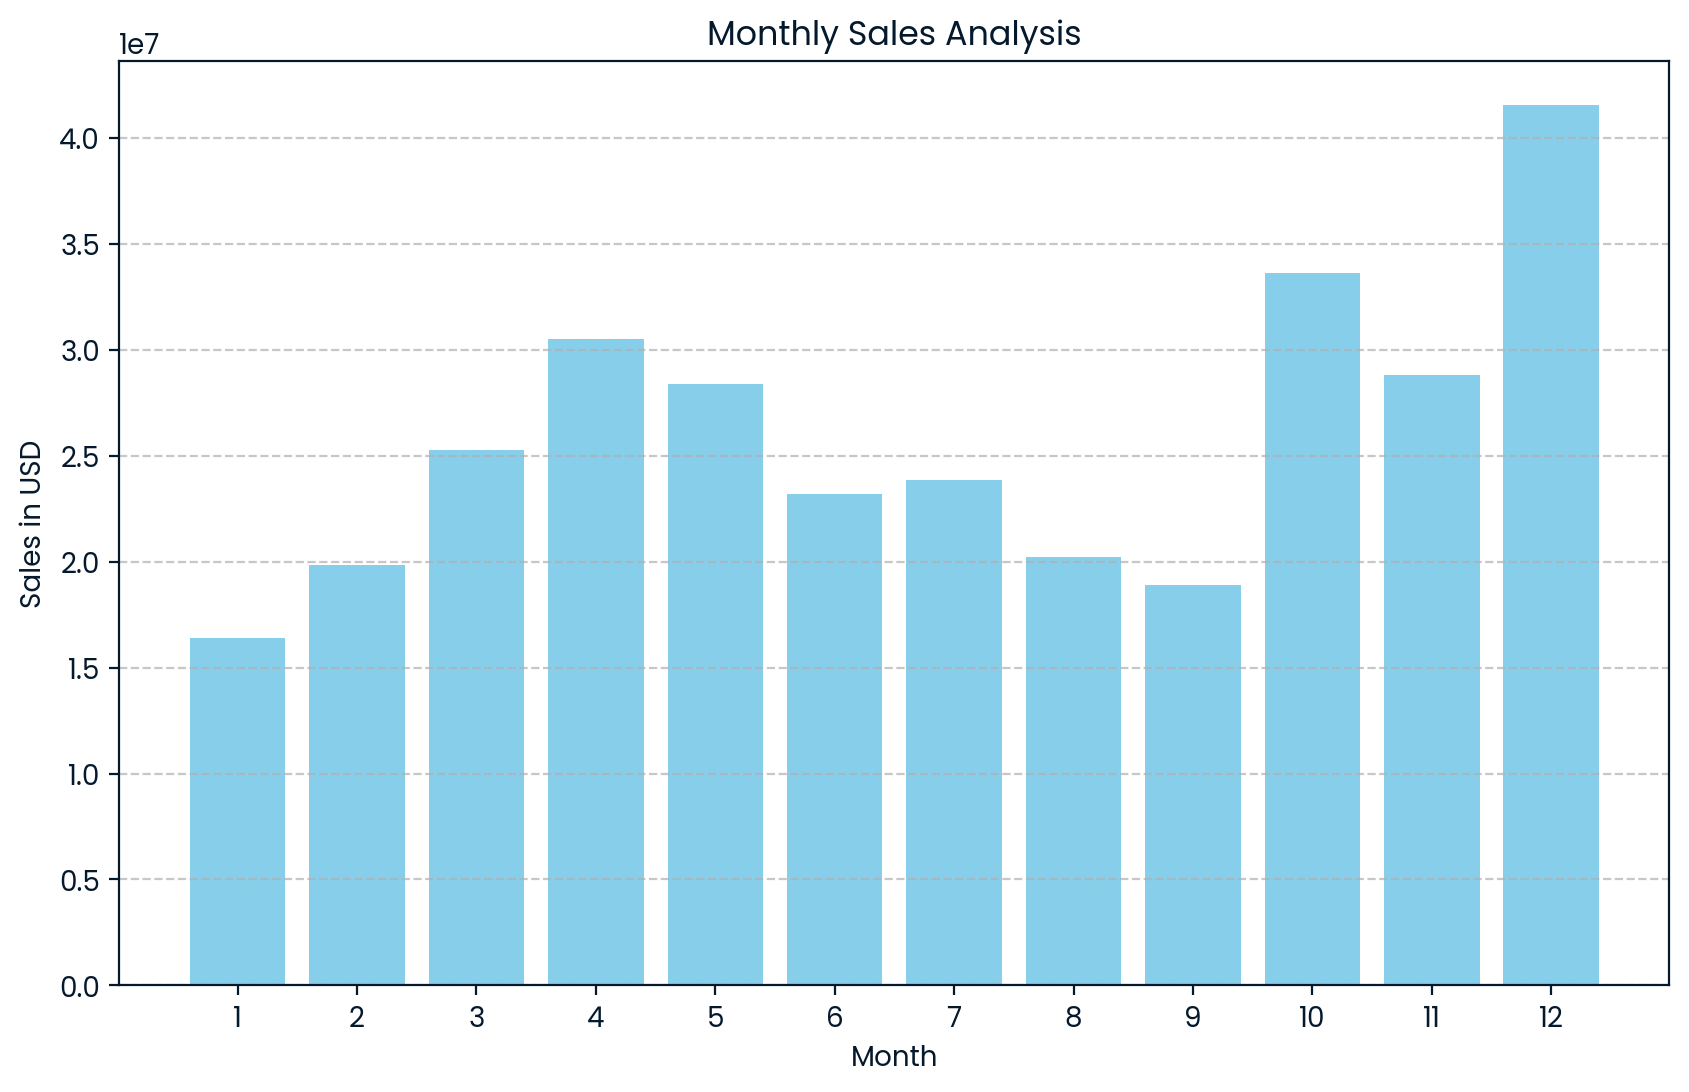

In [15]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.figure(figsize=(10, 6))
plt.bar(months, results['Sales'], color='skyblue')
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.xticks(months)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# What city has the highest number of sales?

## Extracting city from Purchase Address
#### example: 590 6th St, **_San Francisco_**, CA 94016


In [16]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,222910,Apple Airpods Headphones,1,150.00,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,Atlanta
1,222911,Flatscreen TV,1,300.00,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,Seattle
2,222912,AA Batteries (4-pack),1,3.84,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,Atlanta
3,222913,AA Batteries (4-pack),1,3.84,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,Atlanta
4,222914,AAA Batteries (4-pack),5,2.99,14.95,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,Seattle


In [20]:
cities_quantity = all_data.groupby('City')['Quantity Ordered'].sum()
cities_sales = all_data.groupby('City')['Sales'].sum()

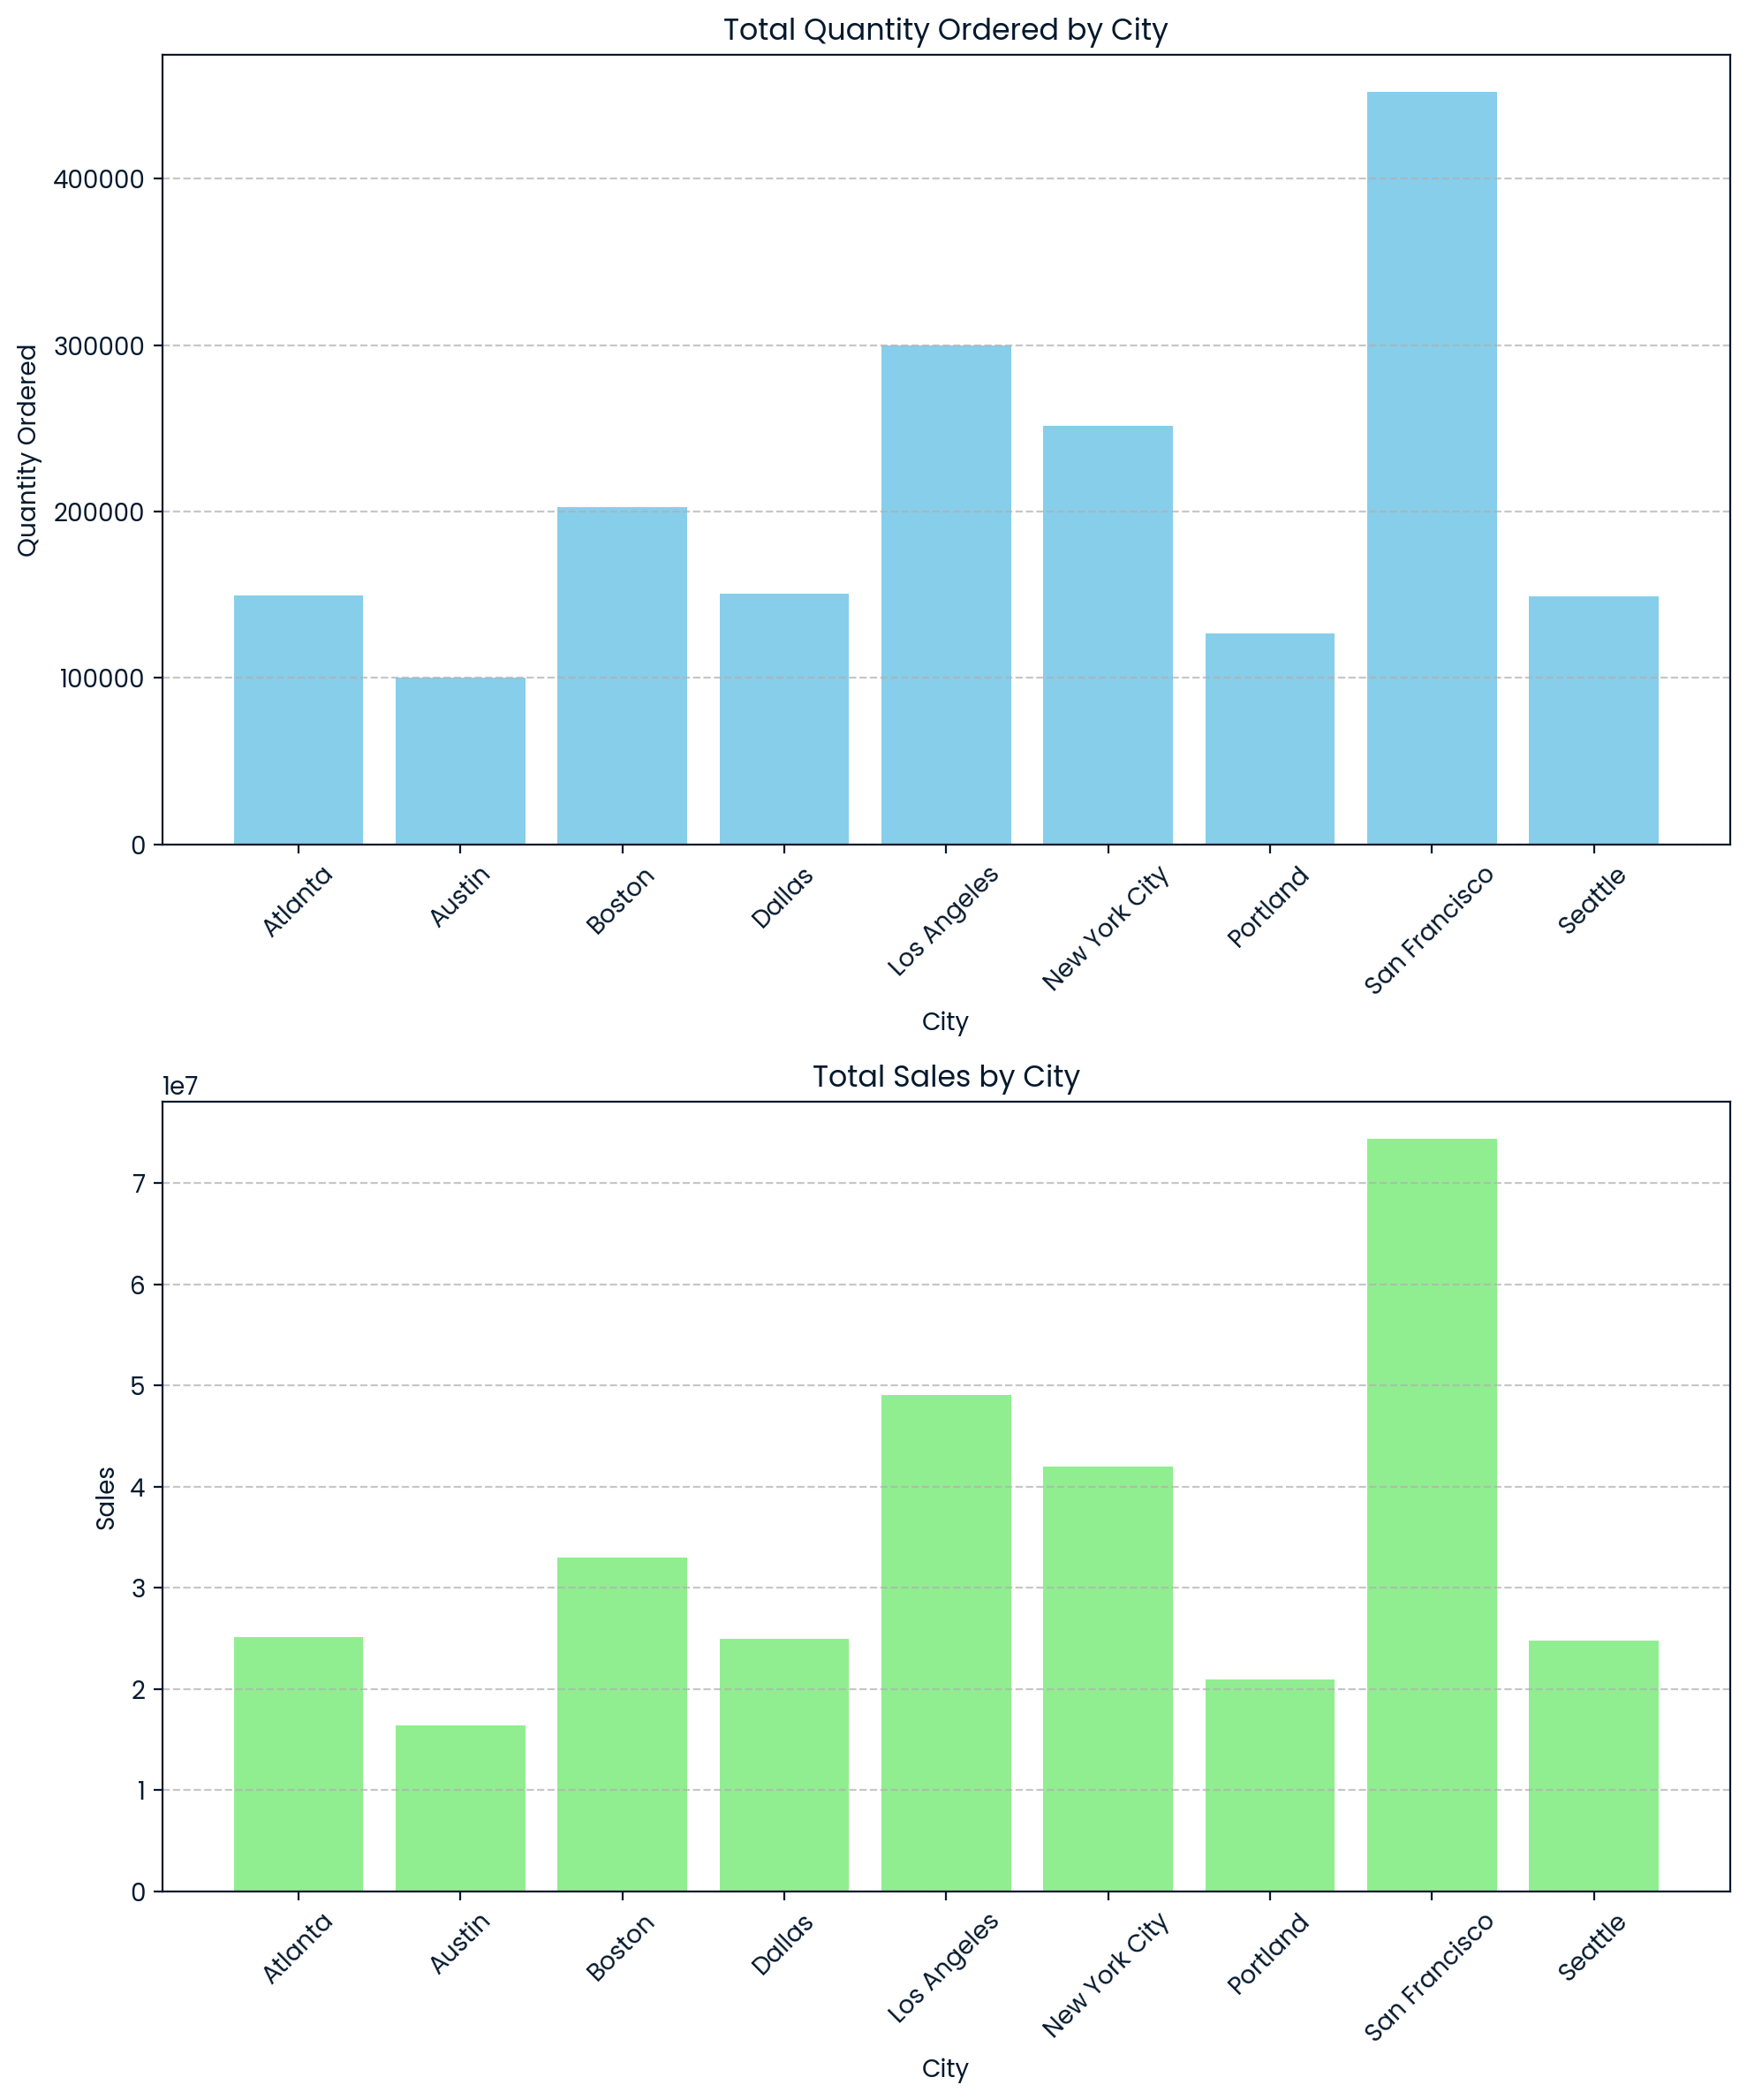

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].bar(cities_quantity.index, cities_quantity.values, color='skyblue')
ax[0].set_title('Total Quantity Ordered by City')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Quantity Ordered')
ax[0].set_xticklabels(cities_quantity.index, rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)


ax[1].bar(cities_sales.index, cities_sales.values, color='lightgreen')
ax[1].set_title('Total Sales by City')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Sales')
ax[1].set_xticklabels(cities_sales.index, rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## What time should we display ads to maximize likelihood of customer's buying product?

In [23]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,222910,Apple Airpods Headphones,1,150.00,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,Atlanta,16,51
1,222911,Flatscreen TV,1,300.00,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,Seattle,8,55
2,222912,AA Batteries (4-pack),1,3.84,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,Atlanta,12,41
3,222913,AA Batteries (4-pack),1,3.84,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,Atlanta,10,15
4,222914,AAA Batteries (4-pack),5,2.99,14.95,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,Seattle,2,13


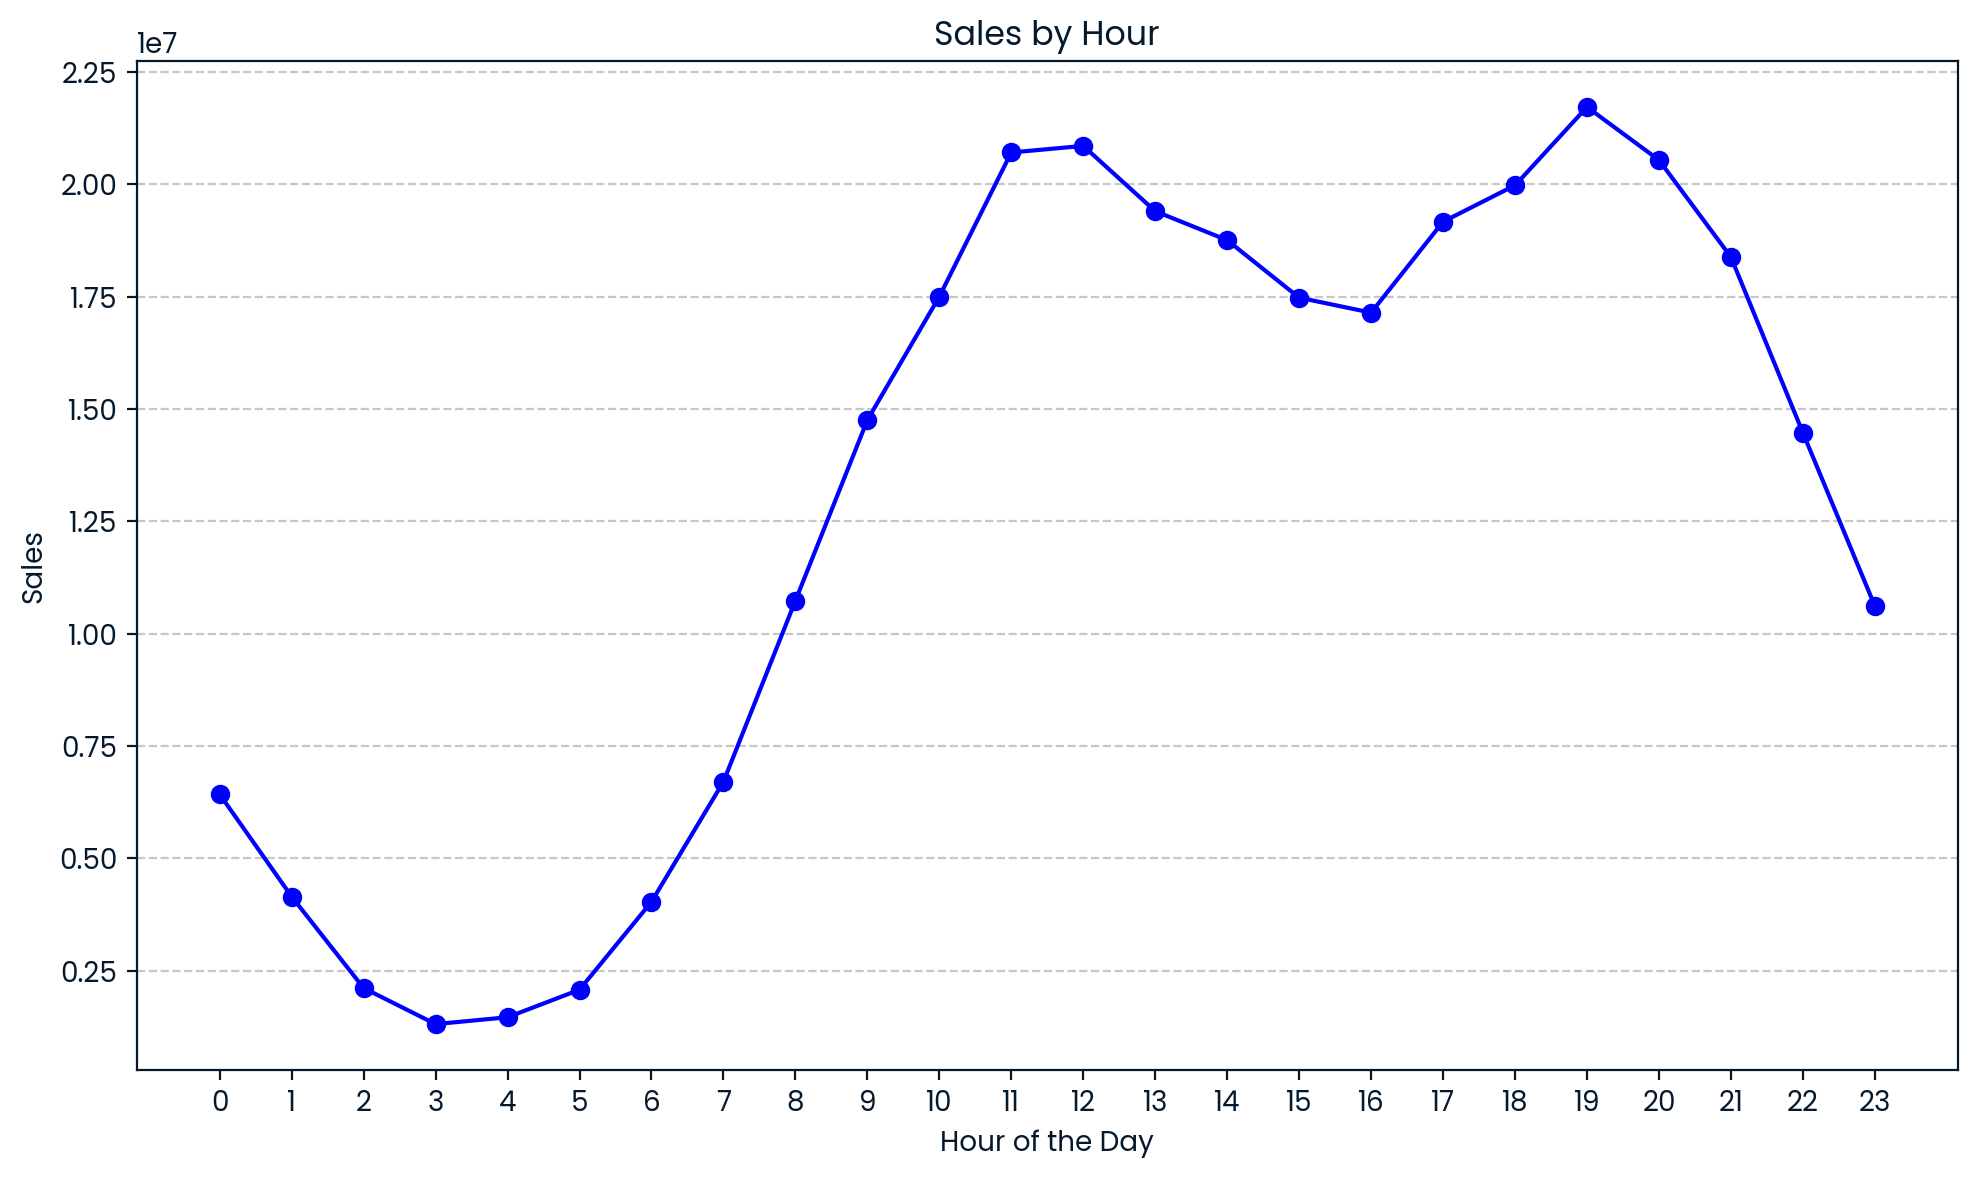

(19, 21716446.86)

In [33]:
# Group data by hour and sum the sales
hourly_sales = all_data.groupby('Hour')['Sales'].sum()

# Plotting the sales by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(hourly_sales.index)
plt.tight_layout()
plt.show()

best_hour = hourly_sales.idxmax()
best_hour_sales = hourly_sales.max()

best_hour, best_hour_sales

## What products are most sold often together?

In [48]:
df_combined = all_data[all_data['Order ID'].duplicated(keep=False)]
df_combined['Grouped'] = df_combined.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_combined = df_combined[['Order ID', 'Grouped']].drop_duplicates()

from collections import Counter
from itertools import combinations

count = Counter()
for row in df_combined['Grouped']:
    row_list = row.split(',')
    row_list = list(set(row_list))
    count.update(Counter(combinations(row_list, 2)))

most_common_products = pd.DataFrame(count.most_common(), columns=['Product Combination', 'Count'])

most_common_products.head(10)

,Product Combination,Count
0,"(iPhone, Lightning Charging Cable)",1010
1,"(Google Phone, USB-C Charging Cable)",985
2,"(iPhone, Wired Headphones)",446
3,"(Wired Headphones, Google Phone)",422
4,"(iPhone, Apple Airpods Headphones)",373
5,"(USB-C Charging Cable, Vareebadd Phone)",367
6,"(Google Phone, Bose SoundSport Headphones)",228
7,"(Wired Headphones, USB-C Charging Cable)",202
8,"(Wired Headphones, Vareebadd Phone)",149
9,"(Apple Airpods Headphones, Lightning Charging ...",115


## What product sold the most? 

In [50]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,222910,Apple Airpods Headphones,1,150.00,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,Atlanta,16,51
1,222911,Flatscreen TV,1,300.00,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,Seattle,8,55
2,222912,AA Batteries (4-pack),1,3.84,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,Atlanta,12,41
3,222913,AA Batteries (4-pack),1,3.84,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,Atlanta,10,15
4,222914,AAA Batteries (4-pack),5,2.99,14.95,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,Seattle,2,13


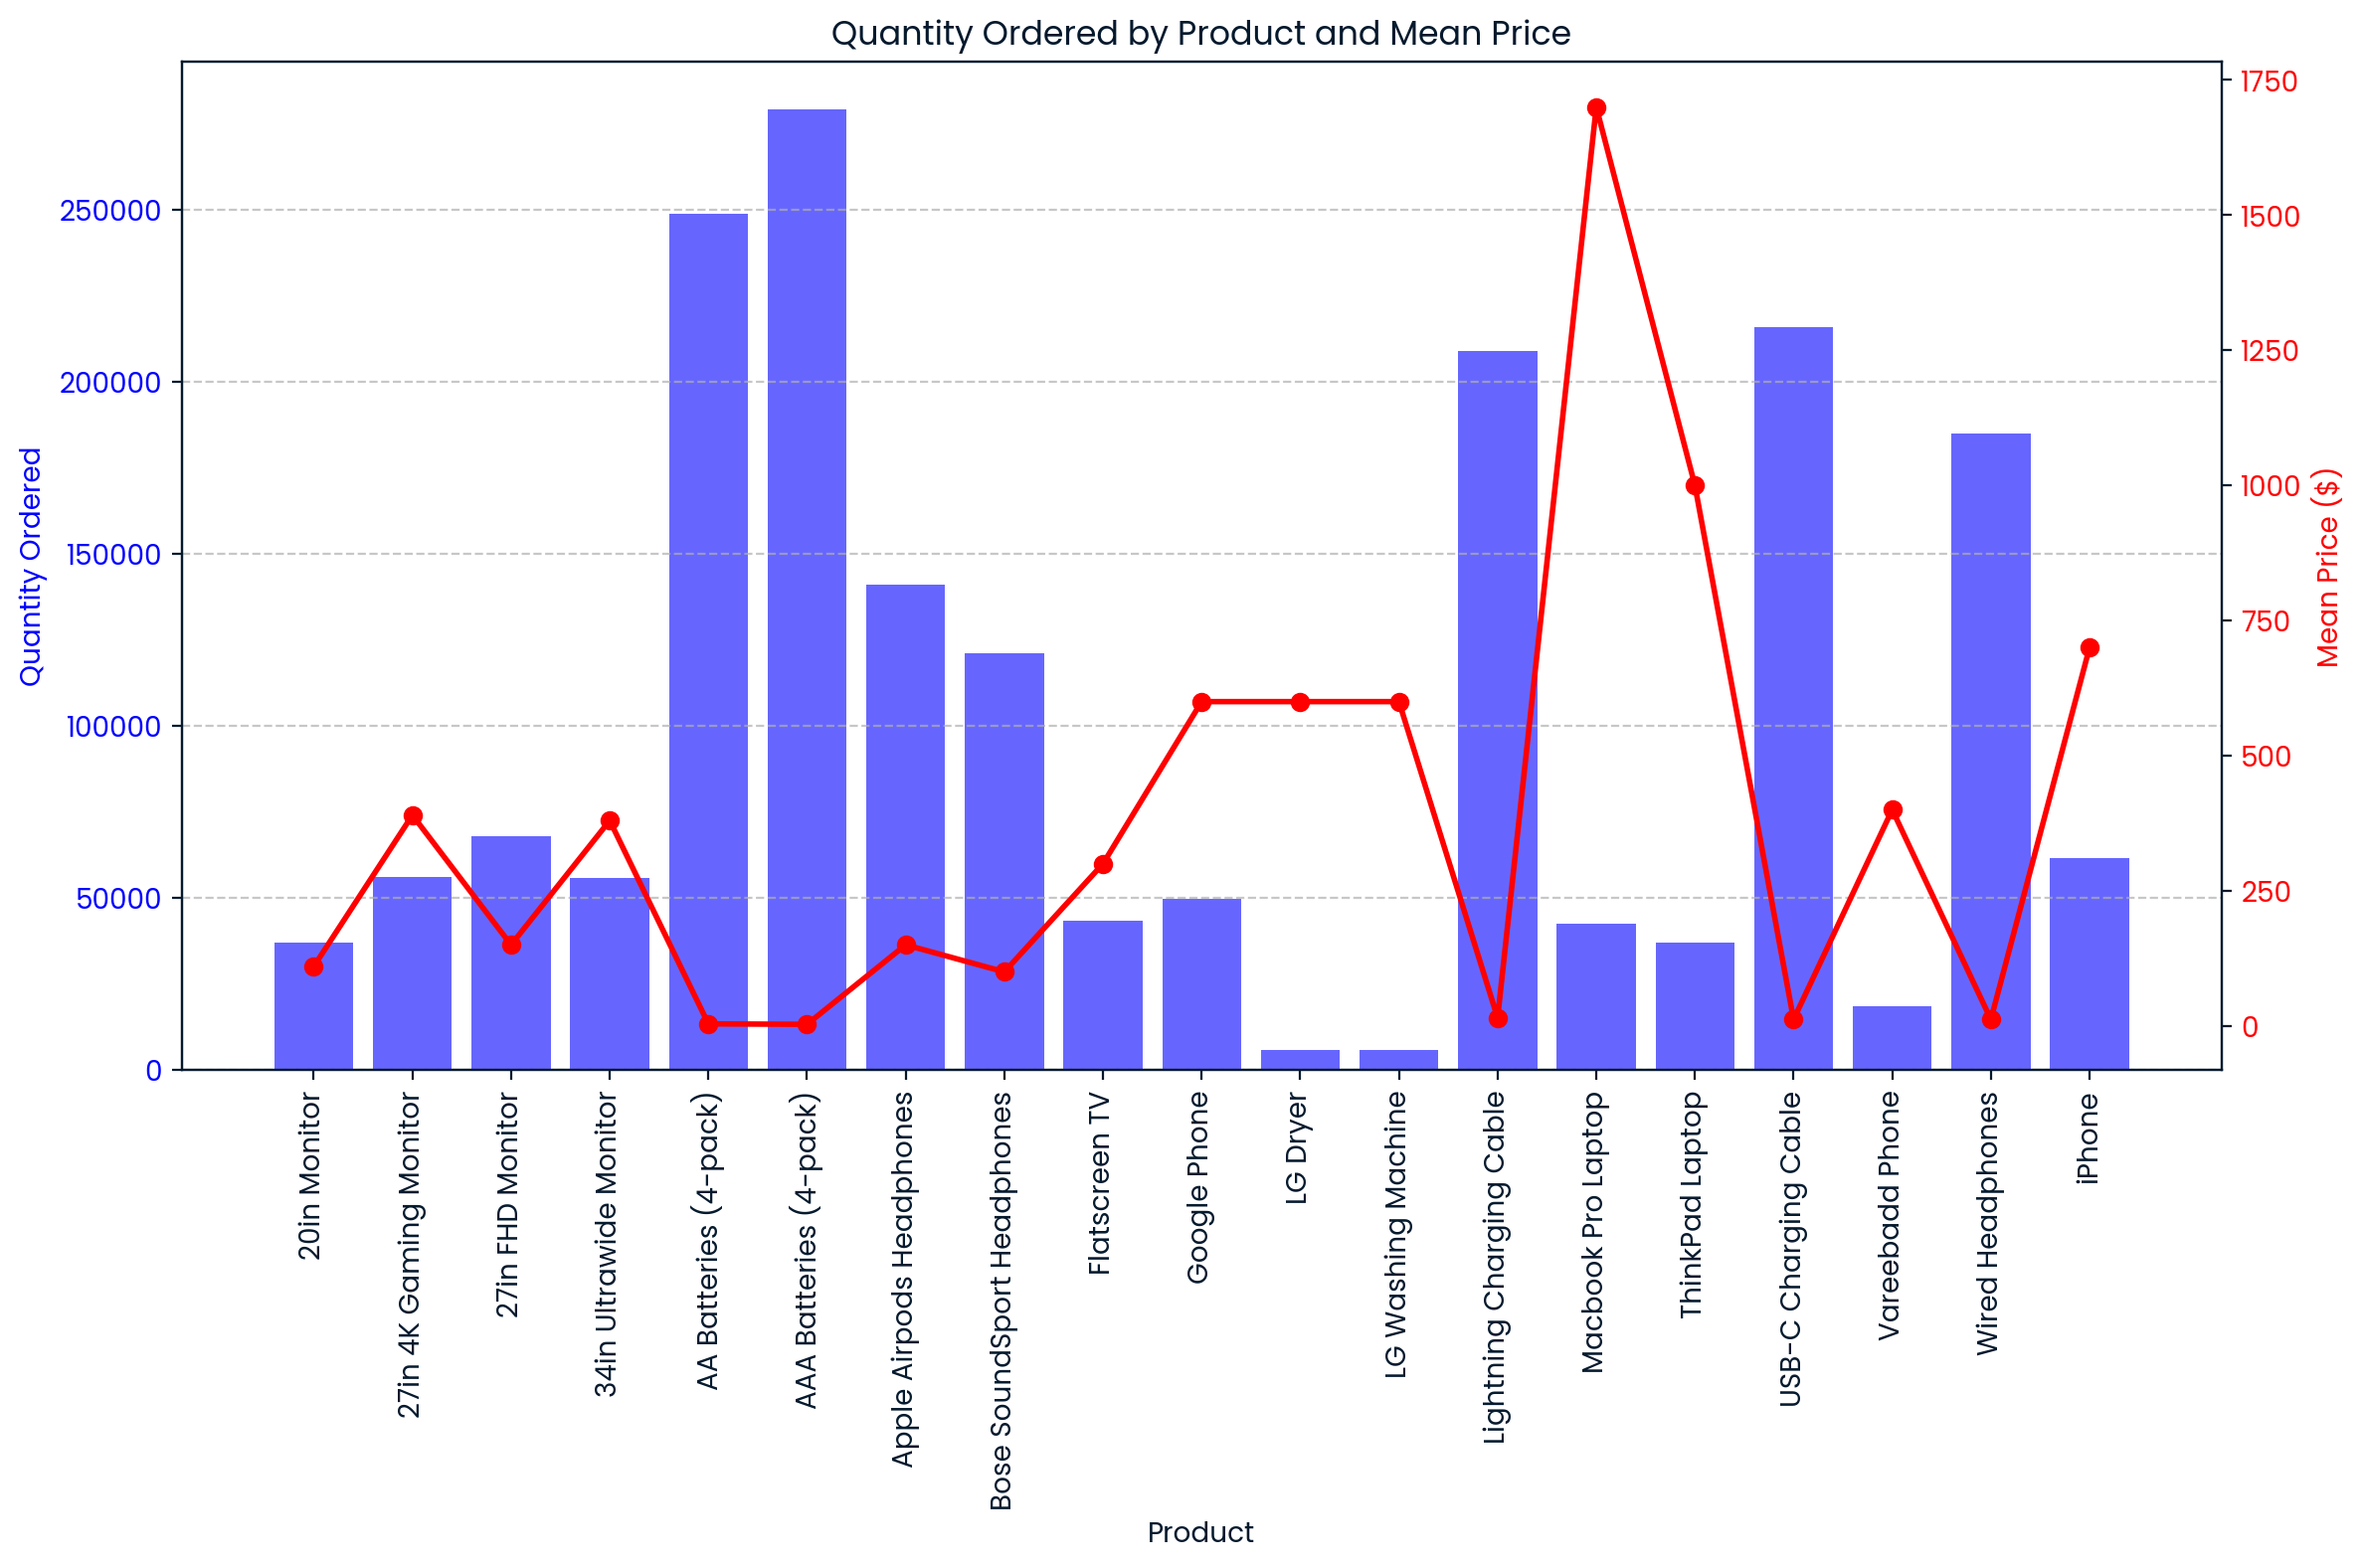

In [64]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

mean_prices = product_group['Price Each'].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.bar(quantity_ordered.index, quantity_ordered.values, color='b', alpha=0.6)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(quantity_ordered.index, rotation=90)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(mean_prices.index, mean_prices.values, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Mean Price ($)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Quantity Ordered by Product and Mean Price')
plt.tight_layout()
plt.show()

mean_prices = mean_prices.reset_index()